# Notes

Different problems give different number of points: 2, 3 or 4.

Please, fill `STUDENT` variable with your name, so that we call collect the results automatically. Each problem contains specific validation details. We will do our best to review your assignments, but please keep in mind, that for this assignment automatic grade (between $0$ an $1$) is the primary source of ground truth.

In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [17]:
import numpy as np
import torch

In [4]:
STUDENT = "Aaron Olender"
ASSIGNMENT = 3
TEST = False

In [5]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 11

# Basic PyTorch

### 1. ReLU activation (2 points).

ReLU is the most commonly used activation function in many deep learning application. It's defined as

$$
ReLU(x) = \max(0, x).
$$

Outpu must be of the same shape as input, and **will be tested against three random combinations of input array dimensions ($100 \leq n < 1000 $)**, while values of the input are drawn from standard normal distribution. Number of dimensions of the input will also be selected randomly and is either 1, 2 or 3.

In [3]:
def relu(arr):
    return np.maximum(arr, 0)

In [51]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, relu)

### 2. Mean squared error (2 points).

In this problem you need to calculate MSE for a pair of tensors `y_true` and `y_pred`. MSE is defined as usual:

$$
L_{MSE} = \frac{1}{N} \sum_i \left(y_i - \hat y_i\right)^2
$$

Note, however, that `y_true` and `y_pred`may be of **different shape**. While `y_true` is always $(N,)$, `y_pred` may be $(N,1)$, $(1, N)$ or $(N,)$. Input values are drawn from standard normal distribution and **shape is selected randomly ($100 \leq n < 1000 $)**.

In [116]:
def mse(y_true, y_pred):
    if y_pred.shape[0] != 1:
        out = (y_pred.T-y_true)**2
        
    else:
        out = (y_pred-y_true)**2
    return out.mean()

In [ ]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, mse)

### 3. Character-level encoding (4 points).

In computations in general and in machine learning specifically letters cannot be used directly, as computers only know aboun numbers. Text data may be encoded in many different ways in natural language processing tasks.

One of the simplest ways to encode letters is to use one-hot encoded representation, with letters being "class labels". A letter is represented by a tensor of shape $(26,)$.

Then, for example, word "python" would be transformed into a tensor of shape $(6, 26)$ with all elements being $0$, except $(0, 15)\sim p,\,(1, 24)\sim y,\,(2, 19)\sim t,...$ being $1$. A phrase would be represented with 3-dimensional tensor.

In this problem you need to create a tensor, which represents a list of words `words` of length $N$. The only characters used are those from `string.ascii_lowercase`, and words are of different length $L_i$. Output must be of shape $(N, \max(L_i), 26)$.

Dimension 0 corresponds to words themselves, with `tensor[0]` being a represetation of `words[0]`. Note, that you need to use padding: although trivial in this case, you must remember, that tensor must accomodate for a longest word, thus dimension 1 is $\max(L_i)$.

Note also, that the only loop you need here is a loop over `words`, there's no need to loop over the resulting tensor.

The result will be tested against three predefined lists of word, with all words being lowercase and containing only ASCII characters.

In [230]:
def word_to_num(word):
    f = lambda x:ord(x)-97
    out = map(f, list(word))
    return np.array(list(out))

    
def encode(words):
    N = len(words)
    max_len = max(map(len,words))
    out = np.zeros((N, max_len, 26))
    for i, word in enumerate(words):
        loc_array = word_to_num(word)
        out[i, np.arange(len(word)), loc_array]=1
    return out
        

In [197]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, encode)

# Gradients

### 4. Generate gradient (1 point).

For 2-dimensional tensor `tr`, calculate a gradient of $\sum\log tr_{ij}$. Note, that you're provided with dimensions and interval, and not the `tr` inself:

- `dims` is a tuple, so that `tr.size()` equals `dims`,
- `lims` is an interval, so that elements of `tr` are integeres, uniformly sampled from `[lims[0], lims[1])` interval (note, that lims[1] is **not** included).

Result must be a tensor of the same shape as `tr` (namely, `dims`), containing gradients of the following function:

$$\sum_{ij}\log tr_{ij}.$$

and generated `tr` itself.

Result **will be tested against multiple random combinations of input tensor dimensions ($10 \leq n < 100 $) and sampling interval (`lims[0]=1`, `10 <= lims[1] < 100`)**.

**Hint**: think on how you can validate the solution yourself, given that gradient can be computed manually on paper.

In [340]:
def generate_grad(dims, lims):
    """Generate gradient of `log(x)`."""
    # generate tr first
    tr = torch.randint(low=lims[0],high= lims[1],size=tuple(dims),dtype=float,requires_grad=True)
    temp = tr.log().sum()
    temp.backward()
    # gradient calculation
    return tr.grad, tr

In [341]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, generate_grad)

### 5. Find a minimum (2 points, manually graded).

Consider the following scalar function:

$$
f(x) = ax^2 + bx + c
$$

Given the $a,b,c$, find $x$, which minimizes $f(x)$. Note this:

- $a,b,c$ are fixed, and generated in such a way, that minimum always exists ($f(x)$ is convex),
- $x$ is a scalar value, i.e. 0-dimensional tensor.

**Hint:** stop for a second to think about which tensor must contain `requires_grad` and on which scalar should `.backward()` be called.

In [24]:
def generate_coeffs():
    a = torch.rand(size=()) * 10
    b = -10 + torch.rand(size=()) * 10
    c = -10 + torch.rand(size=()) * 10
    return a, b, c

def func(x, a, b, c):
    return x**2 * a + x * b + c

In [27]:
torch.manual_seed(4)
EPOCHS = 2000
LR = 1e-1
STARTING_VAL = -5. # Consider choosing different starting values for x to speed-up the optimization

# Initialize x, a, b, c
x = torch.tensor(STARTING_VAL,dtype=float).requires_grad_(True)
a, b, c = generate_coeffs()

# Collect f(x) values during training for visuzalition later on
f_vals = []

for i in range(EPOCHS):
    # set grad to 0 to only calculate current drivative.
    if (x.grad is not None):
        x.grad.data.zero_()
    # calculate grad    
    g = func(x,a,b,c)
    g.backward()
    # take step the size of LR against the gradient
    x.data  = x.data - LR*x.grad.data


    f_vals.append(func(x.data,a,b,c))
    print(x)
    #define small enough gradient to stop optimization
    if torch.abs(x.grad)<0.01:
        print(f'optimization took {i} epochs')
        break
    

tensor(1.0373, dtype=torch.float64, requires_grad=True)
tensor(0.3172, dtype=torch.float64, requires_grad=True)
tensor(0.4031, dtype=torch.float64, requires_grad=True)
tensor(0.3928, dtype=torch.float64, requires_grad=True)
tensor(0.3941, dtype=torch.float64, requires_grad=True)
tensor(0.3939, dtype=torch.float64, requires_grad=True)
optimization took 5 epochs


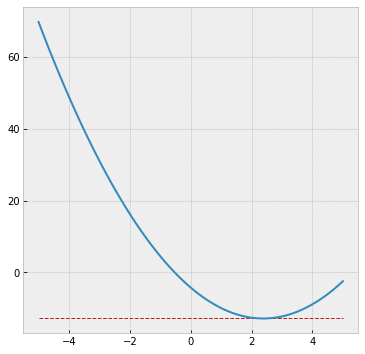

In [442]:
if f_vals:
    grid = np.linspace(-5, 5, 100)
    plt.plot(grid, np.square(grid) * a.item() + grid * b.item() + c.item())
    plt.hlines(f_vals[-1], -5, 5, "firebrick", "--", linewidth=1)
    #plt.plot(f_vals,[func(x,a,b,c) for x in f_vals])
    #plt.scatter(f_vals[-1],func(f_vals[-1],a,b,c))

In [ ]:
PROBLEM_ID = 5
GRADE = 0

if TEST:
    total_grade += GRADE

In [ ]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")